In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
'''This cell tidys the data so it can be better processed'''

EV = pd.read_csv("/Users/juliabaratta/Desktop/epa_EV.csv")
#removes unnecessary rows
EV = EV.iloc[5:-2]
#drops aggrigated rows to avoid unnecessary columns 
EV = EV.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 18', 'Unnamed: 19' ], axis=1)
#renames columns so they make more sense 
# EPS = electric power sector , CS = commercial sector, IS = industrial sector, RS = residential sector
# utl = utility scale, SS = small scale
column_rename = {"Table 3.21. Net Generation from Solar Photovoltaic": "State", "Unnamed: 8": "EPS:Electric_Utilities_Utl2021", "Unnamed: 9": "EPS:Electric_Utilities_Utl2020", "Unnamed: 10": "EPS:IPP_Utl2021", "Unnamed: 11": "EPS:IPP_Utl2020", "Unnamed: 14": "CS:Utl2021", "Unnamed: 15": "CS:Utl2020", "Unnamed: 16": "CS:SS2021", "Unnamed: 17": "CS:SS2020", "Unnamed: 20": "IS:Utl2021", "Unnamed: 21": "IS:Utl2020", "Unnamed: 22": "IS:SS2021", "Unnamed: 23": "IS:SS2020", "Unnamed: 24": "RS:SS2021", "Unnamed: 25": "RS:SS2020"}
EV = EV.rename(columns=column_rename)
#dros rows that don't match the unit of observation
EV = EV.drop([12, 16, 22, 30, 40, 45, 50, 59, 63])

EV = EV.set_index("State")
#deletes commas 
for column in EV.columns: 
    EV[column] = EV[column].str.replace(',', '', regex=True)
    #EV[column] = EV[column].str.replace('0', np.NaN, regex=True)
#converts to int    
EV['RS:SS2020'] = EV['RS:SS2020'].astype(int)
EV['RS:SS2021'] = EV['RS:SS2021'].astype(int)


In [112]:
#here we see residential small scale generation of PV energy (in thousand MWH) averaged over two years by state

av_RS_SS = (EV['RS:SS2021'] + EV['RS:SS2020'])/2
print(av_RS_SS)

State
New England              1672.0
Connecticut               448.5
Maine                      62.0
Massachusetts             860.0
New Hampshire             102.5
Rhode Island               89.0
Vermont                   110.0
New Jersey               1180.5
New York                 1183.0
Pennsylvania              355.0
Illinois                  267.5
Indiana                    88.5
Michigan                   97.0
Ohio                      100.5
Wisconsin                  67.0
Iowa                       82.0
Kansas                     33.5
Minnesota                  94.5
Missouri                  223.0
Nebraska                   13.5
North Dakota                0.5
South Dakota                1.0
Delaware                   91.5
District of Columbia       75.0
Florida                  1215.5
Georgia                    43.5
Maryland                  707.5
North Carolina            256.5
South Carolina            278.0
Virginia                  192.0
West Virginia              13.0
Al

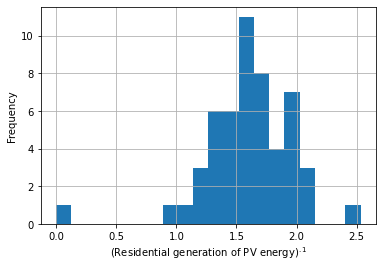

In [113]:
grouped = EV["RS:SS2020"]
grouped = pd.DataFrame(grouped)
grouped['raised'] = (EV["RS:SS2020"]**.1)
grouped['raised'].hist(bins = 20)
plt.xlabel('(Residential generation of PV energy)$^{.1}$')
plt.ylabel('Frequency')
plt.show()